<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-can-we-do-with-geoqueries?" data-toc-modified-id="What-can-we-do-with-geoqueries?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What can we do with geoqueries?</a></span></li><li><span><a href="#We-generate-the-connection-with-Mongo" data-toc-modified-id="We-generate-the-connection-with-Mongo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>We generate the connection with Mongo</a></span></li><li><span><a href="#Import-Collections" data-toc-modified-id="Import-Collections-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Collections</a></span></li><li><span><a href="#Create-indexes" data-toc-modified-id="Create-indexes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create indexes</a></span></li><li><span><a href="#Let's-start-with-the-Geoqueries" data-toc-modified-id="Let's-start-with-the-Geoqueries-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Let's start with the Geoqueries</a></span></li><li><span><a href="#geoIntersects" data-toc-modified-id="geoIntersects-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>geoIntersects</a></span><ul class="toc-item"><li><span><a href="#Where-is-a-given-point-located?" data-toc-modified-id="Where-is-a-given-point-located?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Where is a given point located?</a></span></li></ul></li><li><span><a href="#GeoWithin" data-toc-modified-id="GeoWithin-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><code>GeoWithin</code></a></span></li><li><span><a href="#Near" data-toc-modified-id="Near-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Near</a></span></li><li><span><a href="#We-test-Geoqueries-with-real-data" data-toc-modified-id="We-test-Geoqueries-with-real-data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>We test Geoqueries with real data</a></span></li><li><span><a href="#Let's-find-the-bookstores-that-are-near-my-house" data-toc-modified-id="Let's-find-the-bookstores-that-are-near-my-house-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Let's find the bookstores that are near my house</a></span></li><li><span><a href="#Collections-summary" data-toc-modified-id="Collections-summary-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Collections summary</a></span><ul class="toc-item"><li><span><a href="#Import-into-Compass" data-toc-modified-id="Import-into-Compass-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Import into Compass</a></span></li><li><span><a href="#Into-Jupyter" data-toc-modified-id="Into-Jupyter-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Into Jupyter</a></span></li><li><span><a href="#Set-some-indexes" data-toc-modified-id="Set-some-indexes-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Set some indexes</a></span></li></ul></li><li><span><a href="#Other-interesting-info:" data-toc-modified-id="Other-interesting-info:-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Other interesting info:</a></span></li></ul></div>

# Geoqueries en Mongo

In [2]:
import requests
from pymongo import MongoClient
from pymongo import GEOSPHERE
import pandas as pd
import json

## What can we do with geoqueries?
With geoqueries we can answer questions like the following
- Where are the closest pharmacies to my location?
- What restaurants are in this area?

Each point on the Earth is characterized by two numbers:
- Longitude: angle with respect to the Greenwich meridian. It ranges from -180° (anti-Greenwich) to +180° (also anti-Greenwich)

- Latitude: angle with respect to the equator. Ranges from -90° (south) to +90° (north)

![latierra](../images/latlon.gif)

In [ ]:
# Mercator projection

![](https://www.researchgate.net/profile/Emil-Adiels/publication/327118518/figure/fig4/AS:661927344762880@1534827185725/The-Mercator-projection-which-maps-the-sphere-coordinates-onto-a-plane-invented-1569.png)

## We generate the connection with Mongo

In [3]:
client = MongoClient("localhost:27017")
db = client.get_database("Ironhack")
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Ironhack')

## Import Collections

- NY restaurants `jsons-input/nyrestaurants.json` as **nyrest** on MongoCompass, [source]()
- NY neighborhoods `jsons-input/nyneighborhoods.json` as **nyneigh** on MongoCompass [source](https://raw.githubusercontent.com/mongodb/docs-assets/geospatial/restaurants.json)

In [4]:
nyrest = db.get_collection("nyrest")
nyneigh = db.get_collection("nyneigh")

## Create indexes
MongoDB's geospatial indexing allows you to efficiently run **spatial queries** on a collection containing geospatial shapes and points.
We are going to create a geo-index so that Mongo knows that we want to do geo-queries on this collection.
This only needs to be done once, and now the Mongo collection is properly indexed forever.
[Documentation](https://docs.mongodb.com/manual/geospatial-queries/#geospatial-indexes) of the indexes.

It is important to indicate the field where we have both the type of element (polygons or points (point)) and the coordinates.

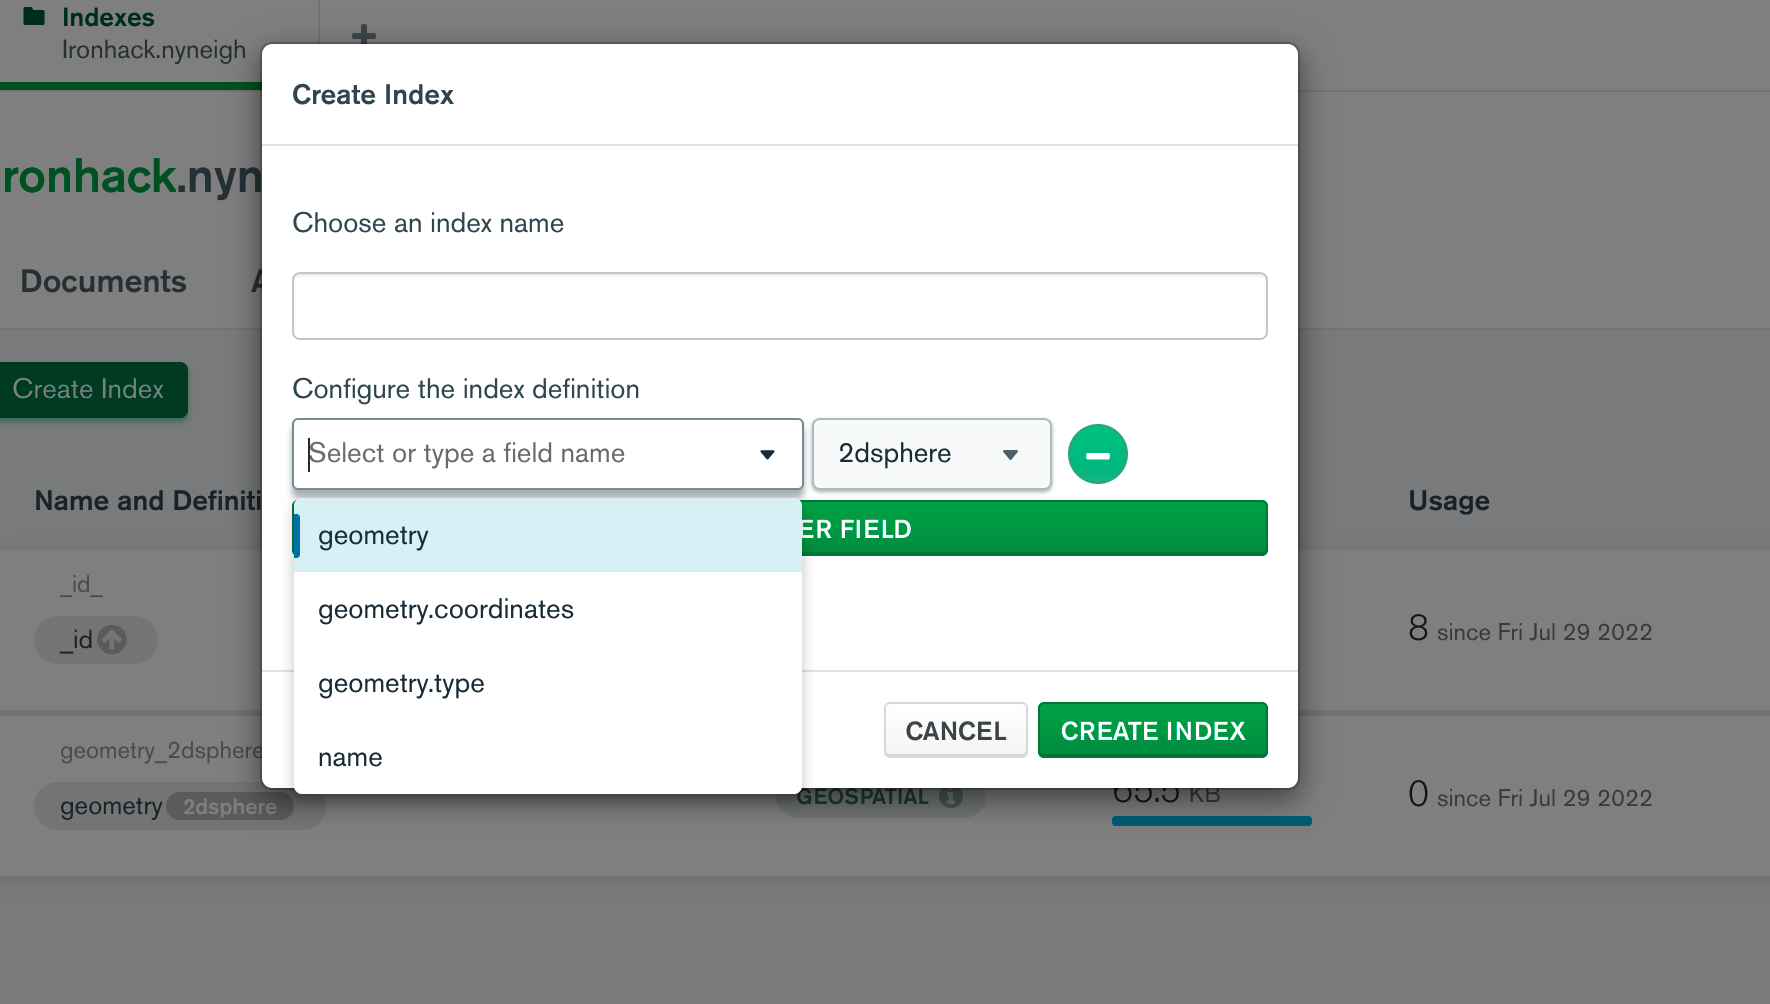

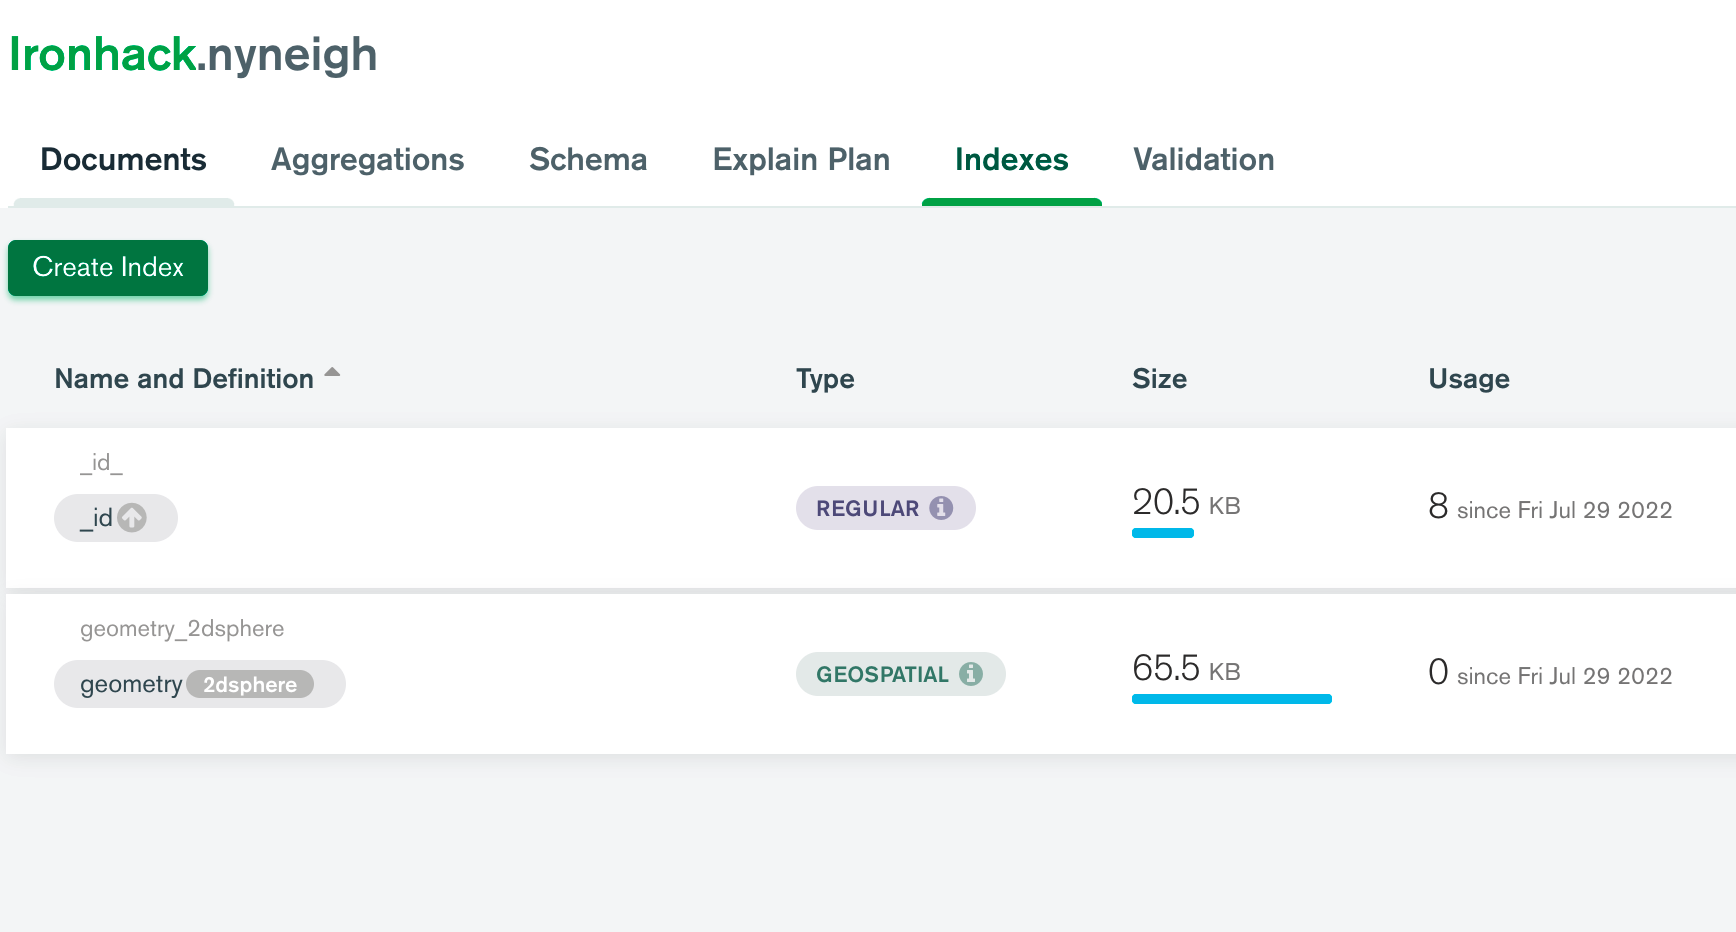

In [7]:
#db.nyrest.create_index([("geometry", GEOSPHERE)])

'geometry_2dsphere'

In [8]:
db.nyrest.create_index([("location", GEOSPHERE)])

'location_2dsphere'

## Let's start with the Geoqueries
- What neighborhood am I in?
- Which elements **intersect** the given element?

## geoIntersects

We need to have the data with type polygon in this case we have a collection with neighborhoods where each neighborhood has inside the polygon that delimits it. 

And each neighborhood is a document, that's why when it intersects it returns the document and I see that it is the specific neighborhood.

Select documents whose geospatial data intersects with a specified GeoJSON object; that is, when the intersection of the data and the specified object is not empty.

### Where is a given point located?

`my_location` **$geoIntersects** with which area enclosed in a `polygon` ?

**Where am I?**

- My location: `-73.93, 40.82` 
- Collection: `nyneigh` 

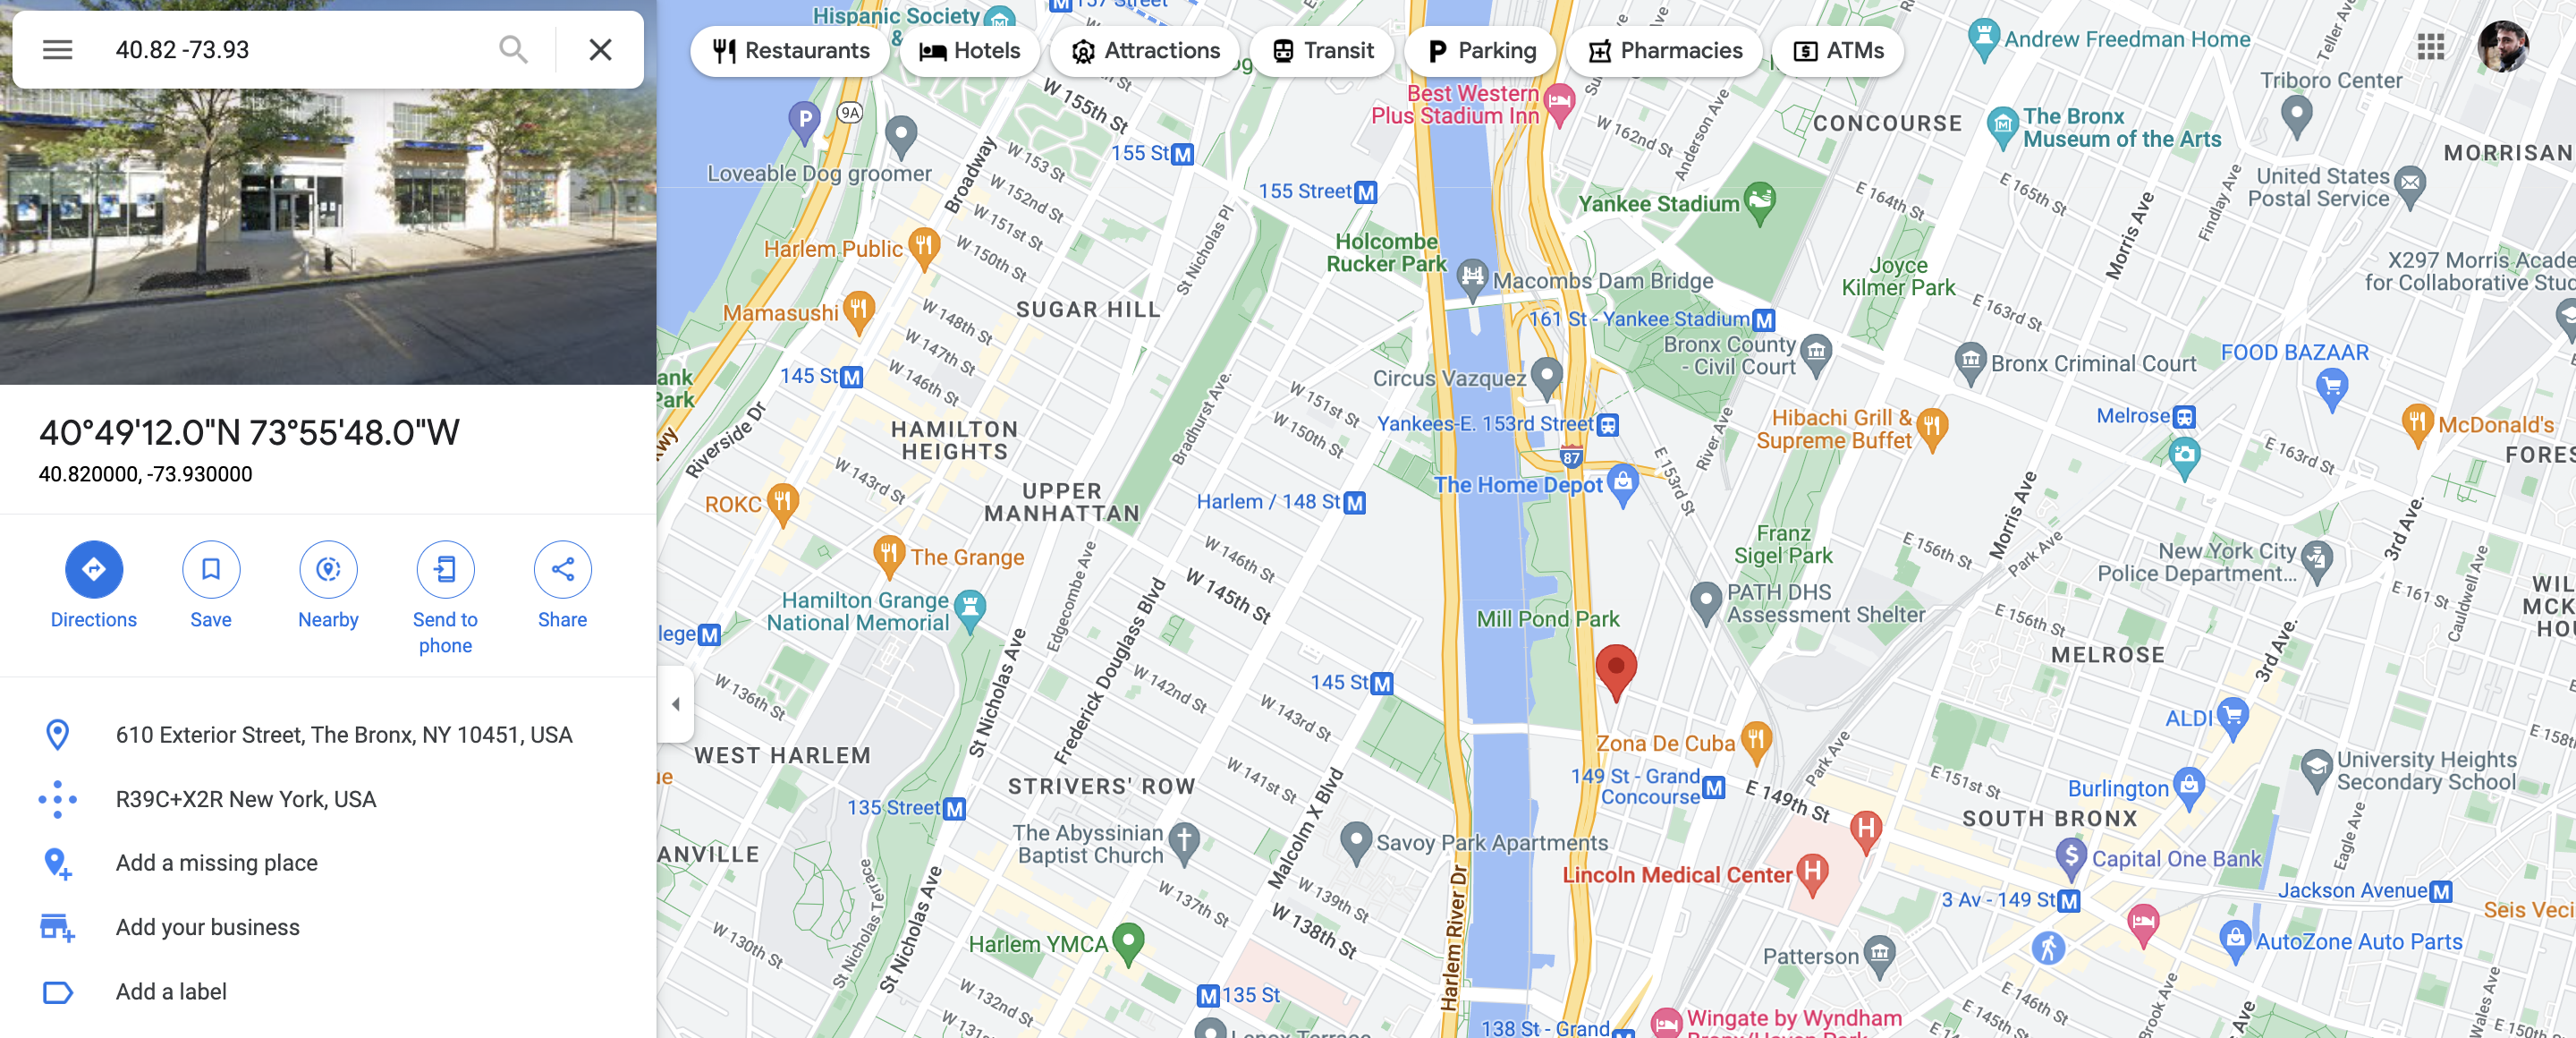

In [ ]:
# Turn things into type_point structure

In [9]:
my_location = [-73.93, 40.82]

In [11]:
def type_point(list_):
    return {"type":"Point", "coordinates":list_}

In [16]:
point_loc = type_point(my_location)
point_loc

{'type': 'Point', 'coordinates': [-73.93, 40.82]}

In [ ]:
# Let's see one neighborhood

In [13]:
nyneigh.find_one()

{'_id': ObjectId('55cb9c666c522cafdb053a1a'),
 'geometry': {'coordinates': [[[-73.94193078816193, 40.70072523469547],
    [-73.9443878859649, 40.70042452378256],
    [-73.94424286147482, 40.69969927964773],
    [-73.94409591260093, 40.69897295461309],
    [-73.94394947271304, 40.69822127983908],
    [-73.94391750192877, 40.69805620211356],
    [-73.94380383211836, 40.697469265449826],
    [-73.94378455587042, 40.6973697290538],
    [-73.94374306706803, 40.69715549995503],
    [-73.9437245356891, 40.697059812179496],
    [-73.94368427322361, 40.696851909818065],
    [-73.9436842703752, 40.69685189440415],
    [-73.94363806934868, 40.69661331854307],
    [-73.94362121369004, 40.696526279661654],
    [-73.9435563415296, 40.69619128295102],
    [-73.94354024149403, 40.6961081421151],
    [-73.94352527471477, 40.69603085523812],
    [-73.94338802084431, 40.69528899051899],
    [-73.943242490861, 40.694557485733355],
    [-73.94312826743185, 40.693967038330925],
    [-73.94311427813774, 40.6

The geometry that goes without a dollar is because we are going to look in the neighborhood collection and where the information is inside the key geometry, it can be seen right up here 👆🏻. The geometry that carries dollar is the mongo syntax for all geospatial queries.
To make a geospatial query to Mongo I have to pass the coordinates in point type

In [14]:
proy = {"_id": 0, "name": 1}

In [17]:
point_loc

{'type': 'Point', 'coordinates': [-73.93, 40.82]}

`my_location` **$geoIntersects** with which area enclosed in a `polygon` ?

In [19]:
nyneigh.find_one({"geometry":
                      {"$geoIntersects": 
                           {"$geometry": point_loc}}}, proy)

{'name': 'West Concourse'}

In [20]:
# COLLECTIONS: find one document that in its geometry key/property is intersecting with 
# my_location. 

# show me the name of that document

if a point is within an area: intersect
    
am I here? country/neighborhood/city

## `GeoWithin`

![](https://www.mongodb.com/docs/manual/images/geospatial-polygon-hells-kitchen.png)

In [24]:
hells_kitchen = {
   "geometry": {
      "type": "Polygon",
      "coordinates": [[
         [ -73.99, 40.75 ],
         [ -73.98, 40.76 ],
         [ -73.99, 40.75 ]
      ]]
    },
    "name": "Hell's Kitchen"
}

what `venus/locations/things` are **$geoWithin** `polygon`?

**What restaurants can I find in this neighborhood?**

- Collection: `nyneigh` 
- Collection: `nyrest`


- Result: list of restaurants in a given area

In [ ]:
# 1. NEIGHBORHOODS

In [28]:
bedford_neigh = nyneigh.find_one()
#bedford_neigh

In [46]:
bedford_coordinates = bedford_neigh["geometry"]
bedford_coordinates

{'coordinates': [[[-73.94193078816193, 40.70072523469547],
   [-73.9443878859649, 40.70042452378256],
   [-73.94424286147482, 40.69969927964773],
   [-73.94409591260093, 40.69897295461309],
   [-73.94394947271304, 40.69822127983908],
   [-73.94391750192877, 40.69805620211356],
   [-73.94380383211836, 40.697469265449826],
   [-73.94378455587042, 40.6973697290538],
   [-73.94374306706803, 40.69715549995503],
   [-73.9437245356891, 40.697059812179496],
   [-73.94368427322361, 40.696851909818065],
   [-73.9436842703752, 40.69685189440415],
   [-73.94363806934868, 40.69661331854307],
   [-73.94362121369004, 40.696526279661654],
   [-73.9435563415296, 40.69619128295102],
   [-73.94354024149403, 40.6961081421151],
   [-73.94352527471477, 40.69603085523812],
   [-73.94338802084431, 40.69528899051899],
   [-73.943242490861, 40.694557485733355],
   [-73.94312826743185, 40.693967038330925],
   [-73.94311427813774, 40.693894720557466],
   [-73.94310040895432, 40.69382302905847],
   [-73.9429513613

In [ ]:
# 2. RESTAURANTS

In [26]:
nyrest.find_one()

{'_id': ObjectId('55cba2476c522cafdb053add'),
 'location': {'coordinates': [-73.856077, 40.848447], 'type': 'Point'},
 'name': 'Morris Park Bake Shop'}

In [ ]:
# 3. THE RESULT

In [31]:
query = {"location": # Within the field insied of the restaurant
           {"$geoWithin": { # Check if within
               "$geometry": bedford_coordinates  # The polygon
                                               }} }

In [35]:
"$gte" # greater than or equal
"$gt" # greather than
"$geoWithin" # checks for a parameter to be inside of an area

'$geoWithin'

In [42]:
bedford_restaurants = list(nyrest.find(query, {"_id":0}))
bedford_restaurants[0]

{'location': {'coordinates': [-73.9467295, 40.6804619], 'type': 'Point'},
 'name': 'Island Salad'}

In [43]:
df = pd.DataFrame(bedford_restaurants)
df

location  \
0    {'coordinates': [-73.9467295, 40.6804619], 'ty...   
1    {'coordinates': [-73.94659899999999, 40.680411...   
2    {'coordinates': [-73.94650109999999, 40.680409...   
3    {'coordinates': [-73.9459945, 40.6804254], 'ty...   
4    {'coordinates': [-73.9455406, 40.6803509], 'ty...   
..                                                 ...   
126  {'coordinates': [-73.9425072, 40.7009227], 'ty...   
127  {'coordinates': [-73.9435104, 40.7013798], 'ty...   
128  {'coordinates': [-73.9440286, 40.7006576], 'ty...   
129  {'coordinates': [-73.9440286, 40.7006576], 'ty...   
130  {'coordinates': [-73.9434833, 40.7006723999999...   

                            name  
0                   Island Salad  
1    Tak King Chinese Restaurant  
2                  Tastee Pattee  
3                    Burger King  
4          Wing Chang Food House  
..                           ...  
126                  Burger King  
127                   Mcdonald'S  
128      Pollitos Mexican Bistro  
129  Habanero Cafe Mexican Grill  
130           Los Angeles Bakery  

[131 rows x 2 columns]

In [51]:
#Q Dani: distance between two points in a sphere

import math
def haversine(coord1: object, coord2: object):
 
    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)

    print(f"Distance: {meters} m")
    print(f"Distance: {km} km")‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍


# Recap post-break


- Collection with geoJSON
- Index as 2dsphere

- geoIntersectas: to check if a point is within something
- geoWithin: ALL the elements that an area contain

## Near

**What restaurants can I find close to me?**

- Location: `my_coordinates`
- Collection: `nyrest`

- Result: list of restaurants close to me

What elements are located at a distance from a given geometry?
`$nearSphere`/`$near` and `$maxDistance` help us find all elements within `maxDistance` meters of the desired geometry, **ordered** from closest to furthest.

In [52]:
# My location
updated_location = [-73.93, 40.82]

In [53]:
max_meters = 300

In [64]:
type_point_ul = type_point(updated_location)
type_point_ul

{'type': 'Point', 'coordinates': [-73.93, 40.82]}

In [65]:
query = {"location": 
         {"$near": {
             "$geometry": type_point_ul, "$maxDistance": max_meters
                                         }}}

In [67]:
closeby_restaurants = list(nyrest.find(query, projection = {"_id":0, "name":1}))
closeby_restaurants

[{'name': ''},
 {'name': 'Subway'},
 {'name': 'Glacken Bar'},
 {'name': 'Sunlight Restaurant'},
 {'name': 'The News Room Jazz Club'},
 {'name': 'Glen Roy Bar And Grill'},
 {'name': ''},
 {'name': "Applebee'S Neighborhood Grill & Bar"},
 {'name': 'Marisco Centro Seafood Restaurant  & Bar'},
 {'name': "Big Papa'S"},
 {'name': 'Popeyes Chicken & Biscuits'},
 {'name': 'Burger King'},
 {'name': 'Haagan Daz'},
 {'name': "Mcdonald'S"},
 {'name': "Giovanni'S Restaurant"},
 {'name': 'Planet Wings'},
 {'name': 'Brothers Seafood'}]

In [68]:
closeby_restaurants_2 = [element for element in closeby_restaurants if element["name"] != ""]
closeby_restaurants_2

[{'name': 'Subway'},
 {'name': 'Glacken Bar'},
 {'name': 'Sunlight Restaurant'},
 {'name': 'The News Room Jazz Club'},
 {'name': 'Glen Roy Bar And Grill'},
 {'name': "Applebee'S Neighborhood Grill & Bar"},
 {'name': 'Marisco Centro Seafood Restaurant  & Bar'},
 {'name': "Big Papa'S"},
 {'name': 'Popeyes Chicken & Biscuits'},
 {'name': 'Burger King'},
 {'name': 'Haagan Daz'},
 {'name': "Mcdonald'S"},
 {'name': "Giovanni'S Restaurant"},
 {'name': 'Planet Wings'},
 {'name': 'Brothers Seafood'}]

In [69]:
rest_2 = pd.DataFrame(closeby_restaurants_2)
rest_2

name
0                                     Subway
1                                Glacken Bar
2                        Sunlight Restaurant
3                    The News Room Jazz Club
4                     Glen Roy Bar And Grill
5        Applebee'S Neighborhood Grill & Bar
6   Marisco Centro Seafood Restaurant  & Bar
7                                 Big Papa'S
8                 Popeyes Chicken & Biscuits
9                                Burger King
10                                Haagan Daz
11                                Mcdonald'S
12                     Giovanni'S Restaurant
13                              Planet Wings
14                          Brothers Seafood

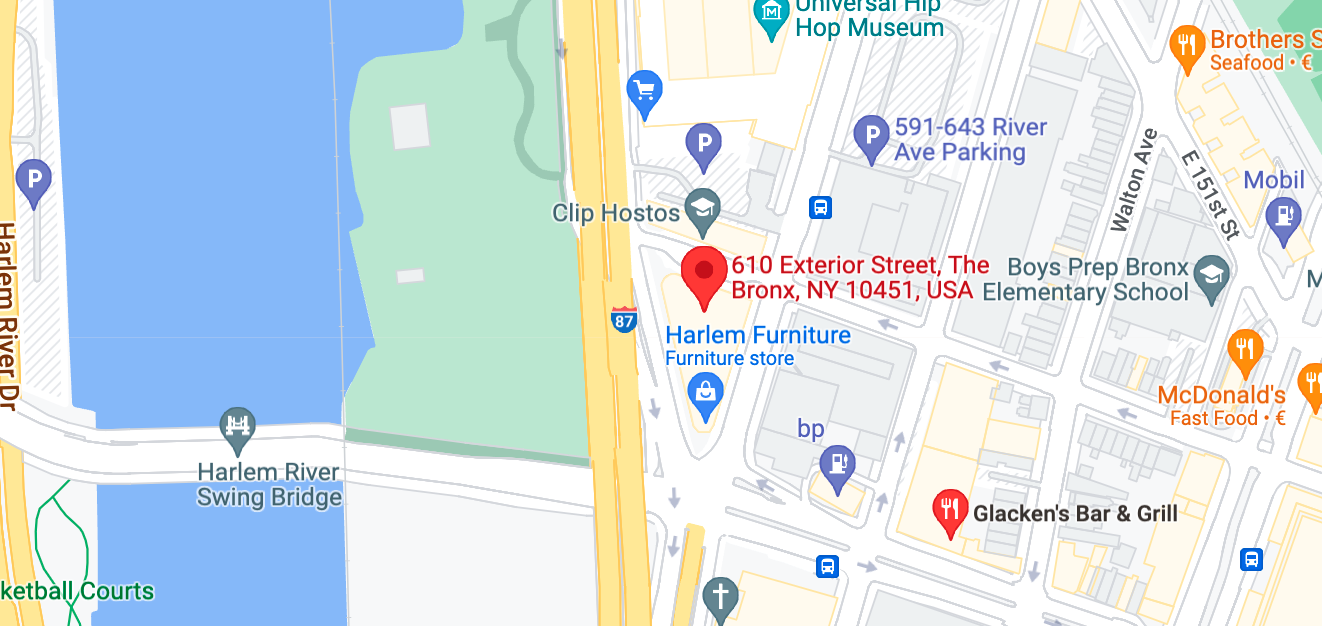

In [72]:
# By passing ONE location ([x, y]) -> type_point
# I queried the closest rest to that location (collection: restaurants)
# I get a list

# By using $near

## We test Geoqueries with real data

- Districts: `jsons-input/distritos.json` - original data from [here](https://team.carto.com/u/jsanz/tables/distritos/public)

**What neighborhood is IH Madrid located in?**

- Location: `IH_coordinates`
- Collection: `districts`

- Result: neighborhood

In [78]:
with open ("jsons-input/distritos.geojson") as f:
    districts = json.load(f)

In [86]:
with open ("jsons-output/just_districts.json", "w") as file:
    json.dump(districts["features"], file)

I see that the value of "Features" is the list of dictionaries where the polygons are. Each dictionary is a district. So I extract features and load it into a json called districts_well

I bring back the geocode function that gave me the latitude and longitude of a string directly in point type

In [87]:
def geocode(direccion):
    """
    Gets typePoint coordinates from a location you pass
    """
    data = requests.get(f"https://geocode.xyz/{direccion}?json=1").json()
    try:
        return {"type": "Point", "coordinates": [float(data["latt"]), float(data["longt"])]}
    except:
        return data

In [88]:
ironhack = geocode("Paseo de la chopera, 14 Madrid")
ironhack

{'success': False,
 'error': {'code': '006',
  'message': 'Request Throttled. Over Rate limit: up to 2 per sec. See geocode.xyz/pricing',
  'requests': '5'}}

In [89]:
ironhack = {'type': 'Point', 'coordinates': [40.39206, -3.69783]}

It turns out that my polygons in the gejson that I have downloaded have the latitude and longitude backwards, so I am going to reverse the query

In [90]:
reversed_ironhack = {'type': 'Point', 'coordinates': [-3.69783, 40.39206]}

I take out the Ironhack type point to find what district it is in (I'm going to search my own collection of Madrid districts)

In [92]:
dis = db.get_collection("districts")

In [98]:
dis.find_one()["properties"]["nombre"]

'Fuencarral - El Pardo'

In [99]:
ironhack_query = {"geometry": # Is the key that holds the info for the neighborhoods
                     {"$geoIntersects": 
                            {"$geometry": reversed_ironhack}}} # The point I'm passing

In [109]:
# One way
dis.find_one(ironhack_query, projection = {"properties.nombre":1, "_id":0})["properties"]["nombre"]

'Arganzuela'

In [107]:
#Another way
dis.find_one(ironhack_query)["properties"]["nombre"]

'Arganzuela'

- Goal: check if something was within something else
- If a point is whithin an area
- If my coordinates are enclosed in the polygon
- If a given point is enclosed in a document in the collection districts

- Coordinates
- Transform them into type_point
- I build the query, based on the columns that holds the geo info
- Query, and that's it!

# Instructions

1. Go into google maps and choose a location
2. Either get coordinates directly or use the geocode function to get them
3. Transform into a type point


4. Get the collection from jsons-output/just_districts
5. Query


## Let's find the bookstores that are near my house

**What are the closest bookstores to my house?**

- Location: `my_coordinates`
- Collection: `bookstores`

- Result: list of closeby bookstores

- Madrid: bookstores `jsons-output/librerias.json`  - original data: we exported it before

fer = {"type": "Point", "coordinates": [40.4107173, -3.7095711]}

## Collections summary

### Import into Compass
- NY restaurants `jsons-input/nyrestaurants.json` as **nyrest** on MongoCompass, [source]()
- NY neighborhoods `jsons-input/nyneighborhoods.json` as **nyneigh** on MongoCompass [source](https://raw.githubusercontent.com/mongodb/docs-assets/geospatial/restaurants.json)
- Districts: `jsons-output/just_districts.json` as **districts** [source](https://team.carto.com/u/jsanz/tables/distritos/public)
- Madrid: bookstores `jsons-output/librerias.json` as **bookstores** - original data: we exported it before

- You'll also need to have: `jsons-input/distritos.geojson`

- You'll also need to have: `jsons-input/distritos.geojson`

### Into Jupyter

In [ ]:
nyrest = db.get_collection("nyrest")
nyneigh = db.get_collection("nyneigh")
dis = db.get_collection("districts")
books = db.get_collection("bookstores")

### Set some indexes

In [ ]:
db.nyrest.create_index([("location", GEOSPHERE)])
db.nyneigh.create_index([("geometry", GEOSPHERE)])
db.bookstores.create_index([("location", GEOSPHERE)])

## Other interesting info: 

- [BCN districts geoJSONs](https://github.com/martgnz/bcn-geodata/blob/master/districtes/districtes.json)